# Data preprocessing 2

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Unzip data

In [2]:
! unzip -qq "/content/drive/MyDrive/mexican l/Mexican Sign Language Recognition-202205-DB.zip"

### Helper function

In [3]:
# Plot the validation and training data separately
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


## 2. Import dependency

In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
import glob
import os
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf

SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)

## 3. Get Class Names
* 3.1. ClassNames
* 3.2. Get ClassDict

### 3.1. get_className

In [5]:
def get_className(files_list):
    classNames = []
    for file in files_list:
        label = file.split("/")[-1].split("_")[0]
        if label not in classNames:
            classNames.append(label)
    classNames.sort()
    return classNames

### 3.2. get_classDict

In [6]:
def get_classDict(classNames):
    classDict = {}
    for index, className in enumerate(classNames):
        classDict[className] = index
    return classDict

## 4. Data load
* 4.1. load_data
* 4.2. get_dataFrame

### 4.1. load_data (data, label)

In [7]:
def load_data(filePath, classDict, totalClass):
    df = pd.read_csv(filePath).iloc[: ,1:].to_numpy()
    label = classDict[filePath.split("/")[-1].split("_")[0]]
    # label = tf.keras.utils.to_categorical(label, totalClass, dtype='int8')
    return df, label

### 4.2. get_dataFrame(dataFrame, labels)

In [8]:
def get_dataFrame(filesList, classDict, classNames):
    dataFrame = []
    labels = []
    for filePath in tqdm(filesList):
        data, label = load_data(filePath, classDict, len(classNames))
        dataFrame.append(data)
        labels.append(label)
    dataFrame = np.array(dataFrame)
    labels = np.array(labels)
    return dataFrame, labels

## 5. Data preprocessing
* 5.1. labels_oneHot_Encoding
* 5.2. preprocessing (shifting and scaling)

### 5.1. labels_oneHot_Encoding

In [9]:
def labels_oneHot_Encoding(labels, totalClasses):
    return tf.keras.utils.to_categorical(labels, totalClasses, dtype='int8')

## 6. Call all function and get file path
* 6.1. Csv files dir
* 6.2. Get all Files list
* 6.3. get classNames and classDict
* 6.4. get dataFrame and labels
* 6.5. data preprocessing
* 6.6. labels one hot
* 6.7. Data zip
* 6.8. Data shuffle
* 6.9. Data batch

### 6.1. Csv files dir

In [52]:
train_dir = "/content/Mexican Sign Language Recognition/TrainingValidation"
test_dir = "/content/Mexican Sign Language Recognition/Testing"

### 6.2. Get all files list

In [53]:
train_files = glob.glob(f"{train_dir}/*.csv")
test_files = glob.glob(f"{test_dir}/*.csv")

### 6.3. get classNames and classDict

In [54]:
classNames = get_className(train_files)
classDict = get_classDict(classNames)

### 6.4. get dataFrame and labels

In [55]:
trainData, trainLabels =  get_dataFrame(train_files, classDict, classNames)

100%|██████████| 2550/2550 [00:17<00:00, 147.04it/s]


In [56]:
testData, testLabels =  get_dataFrame(test_files, classDict, classNames)

100%|██████████| 450/450 [00:02<00:00, 151.84it/s]


In [57]:
trainData.shape, testData.shape, trainLabels.shape, testLabels.shape

((2550, 20, 201), (450, 20, 201), (2550,), (450,))

### 6.6. Labels onehot encoding

In [58]:
trainLabels[:10]

array([27,  0, 25, 12, 29, 21, 25, 22,  3,  7])

In [59]:
# trainLabels = labels_oneHot_Encoding(trainLabels, len(classNames))
# testLabels = labels_oneHot_Encoding(testLabels, len(classNames))
import tensorflow.keras.utils as tfut
trainLabels = tfut.to_categorical(trainLabels, len(classNames))
testLabels = tfut.to_categorical(testLabels, len(classNames))

In [60]:
trainLabels.shape

(2550, 30)

In [61]:
trainLabels[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0

In [62]:
trainLabels.shape

(2550, 30)

In [63]:
testLabels.shape

(450, 30)

### 6.7. Data shuffle

In [64]:
from sklearn.utils import shuffle
import time
trainData, trainLabels = shuffle(trainData, trainLabels, random_state=SEED)

### 6.8. Zip data

In [22]:
# trainDataset = zip(trainData, trainLabels)
# testDataset = zip(testData, testLabels)

### 6.9. Data Batch

## 7. MOdel 1
* 7.1. Create callback function
* 7.2. Create rnn model
* 7.3. summary
* 7.4. compile
* 7.5. fit the model

### 7.2. Create rnn model

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU

In [73]:
input_shape = trainData.shape[-2:]
model = Sequential()
model.add(LSTM(32, recurrent_dropout=0.2, activation='tanh', unroll=True, return_sequences=True, input_shape=input_shape))
model.add(GRU(32, return_sequences=True))
model.add(LSTM(64, recurrent_dropout=0.2, activation='tanh', unroll=True, return_sequences=True))
model.add(GRU(64, return_sequences=True))
model.add(LSTM(128, recurrent_dropout=0.2, activation='tanh', unroll=True, return_sequences=True))
model.add(GRU(128, return_sequences=True))
model.add(LSTM(256, recurrent_dropout=0.2, activation='tanh', unroll=True, return_sequences=True))
model.add(GRU(256, return_sequences=True))
model.add(LSTM(512, recurrent_dropout=0.2, activation='tanh', unroll=True, return_sequences=True))
model.add(GRU(512, return_sequences=True))
model.add(LSTM(1024, recurrent_dropout=0.2, activation='tanh', unroll=True, return_sequences=True))
model.add(GRU(1024, return_sequences=False))
# model.add(Dense(128, activation='tanh'))
# model.add(Dense(32, activation='tanh'))
model.add(Dense(len(classNames), activation='softmax'))

In [67]:
input_shape

(20, 201)

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 32)            29952     
                                                                 
 gru (GRU)                   (None, 20, 32)            6336      
                                                                 
 lstm_1 (LSTM)               (None, 20, 64)            24832     
                                                                 
 gru_1 (GRU)                 (None, 20, 64)            24960     
                                                                 
 lstm_2 (LSTM)               (None, 20, 128)           98816     
                                                                 
 gru_2 (GRU)                 (None, 20, 128)           99072     
                                                                 
 lstm_3 (LSTM)               (None, 20, 256)           3

In [74]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [75]:
checkpoint_path = f"CheckPoint/cp.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    save_weights_only=True,
    monitor='val_accuracy',
    save_best_only=True
)


In [70]:
testLabels.shape

(450, 30)

In [71]:
trainLabels.shape

(2550, 30)

In [76]:
history = model.fit(
    trainData,
    trainLabels,
    validation_data = (testData, testLabels),
    batch_size=32,
    epochs= 100,
    callbacks = [
        checkpoint_callback
    ]
)

Epoch 1/100
80/80 [==============================] - 67s 250ms/step - loss: 3.1451 - accuracy: 0.0569 - val_loss: 3.0216 - val_accuracy: 0.0667
Epoch 2/100
80/80 [==============================] - 13s 161ms/step - loss: 2.9070 - accuracy: 0.0706 - val_loss: 2.8509 - val_accuracy: 0.1022
Epoch 3/100
80/80 [==============================] - 13s 158ms/step - loss: 2.8308 - accuracy: 0.1024 - val_loss: 2.5473 - val_accuracy: 0.2089
Epoch 4/100
80/80 [==============================] - 12s 150ms/step - loss: 2.4548 - accuracy: 0.1608 - val_loss: 2.5869 - val_accuracy: 0.1622
Epoch 5/100
80/80 [==============================] - 12s 150ms/step - loss: 2.2454 - accuracy: 0.1722 - val_loss: 2.2796 - val_accuracy: 0.1622
Epoch 6/100
80/80 [==============================] - 13s 158ms/step - loss: 2.1478 - accuracy: 0.2137 - val_loss: 2.0526 - val_accuracy: 0.2422
Epoch 7/100
80/80 [==============================] - 12s 151ms/step - loss: 1.9544 - accuracy: 0.2855 - val_loss: 2.2577 - val_accuracy:

In [77]:
model.evaluate(testData, testLabels, batch_size=32)

15/15 [==============================] - 1s 58ms/step - loss: 0.1943 - accuracy: 0.9444


[0.1943427324295044, 0.9444444179534912]

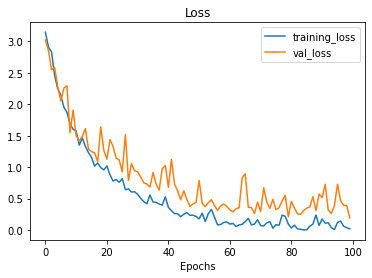

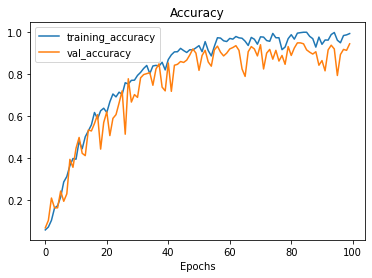

In [79]:
plot_loss_curves(history)

In [89]:
# from tensorflow.keras.callbacks import ModelCheckpoint
# model = model.load_weights(checkoint_path)

In [91]:
# model.evaluate(trainData, trainLabels, batch_size=32)